# Importing Data 


Here we need to  predict the probability that an online transaction is fraudulent, as denoted by the binary target isFraud.


The data is broken into two files identity and transaction, which are joined by TransactionID. Not all transactions have corresponding identity information.


# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('data/train_transaction.csv')
train_identity = pd.read_csv('data/train_identity.csv')

In [3]:
train_data.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [4]:
train_identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [5]:
train_data.tail(20)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
590520,3577520,0,15810785,93.000,W,17150,292.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590521,3577521,0,15810802,48.877,C,12019,305.0,106.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590522,3577522,0,15810823,54.500,W,3166,559.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590523,3577523,0,15810833,58.950,W,13076,456.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590524,3577524,0,15810836,75.000,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590525,3577525,0,15810866,57.950,W,11942,570.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590526,3577526,1,15810876,250.000,R,1214,174.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
590527,3577527,0,15810883,189.950,W,6453,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590528,3577528,0,15810907,279.950,W,15066,170.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590529,3577529,0,15810912,73.838,C,5096,555.0,185.0,mastercard,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train_identity.sort_values(by=['TransactionID'])

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [7]:
# merging train_identity and train_data
data = pd.merge(train_identity, train_data, on='TransactionID', how='outer')

In [8]:
data

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
features = data.columns
missing_data = pd.DataFrame(features, columns=['Features'])
null_perc = []

for feature in features:
  null_perc.append(((data[feature].isna().sum())/data.shape[0])*100)

missing_data['null_perc'] = null_perc

In [10]:
missing_data.sort_values(by=['null_perc'], ascending=False, inplace=True, ignore_index=True)

In [11]:
missing_data.head(15)

,Features,null_perc
0,id_24,99.196159
1,id_25,99.130965
2,id_07,99.127070
3,id_08,99.127070
4,id_21,99.126393
5,id_26,99.125715
6,id_27,99.124699
7,id_23,99.124699
8,id_22,99.124699
9,dist2,93.628374


In [12]:
features_to_drop = missing_data.head(12).Features
features_to_drop

0     id_24
1     id_25
2     id_07
3     id_08
4     id_21
5     id_26
6     id_27
7     id_23
8     id_22
9     dist2
10       D7
11    id_18
Name: Features, dtype: object

In [13]:
data.drop(features_to_drop, axis='columns', inplace = True)

In [14]:
import matplotlib.pyplot as plt

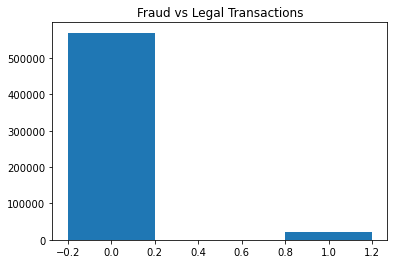

In [15]:
fraudCount = data['isFraud'].sum()
legalCount = data.shape[0] - fraudCount

plt.bar([1,0], [fraudCount, legalCount], width=0.4)
plt.title('Fraud vs Legal Transactions');

As expected our data is highly imbalanced. About 96.5% of the transactions are not fraud. Only about 3.5% is fraud transactions

### Below in the code, when we will be fitting our model we will see which method we used to fix this issue

In [16]:
missing_data.tail(200)

,Features,null_perc
234,V35,28.612626
235,V36,28.612626
236,V37,28.612626
237,V38,28.612626
238,V39,28.612626
...,...,...
429,C10,0.000000
430,C11,0.000000
431,C13,0.000000
432,C14,0.000000


In [17]:
Ds = [ col for col in data.columns if col[0]=='D']
Ds.remove('DeviceInfo')
Ds.remove('DeviceType')

In [18]:
data[Ds].isnull().sum() / 5905.40

D1      0.214888
D2     47.549192
D3     44.514851
D4     28.604667
D5     52.467403
D6     87.606767
D8     87.312290
D9     87.312290
D10    12.873302
D11    47.293494
D12    89.041047
D13    89.509263
D14    89.469469
D15    15.090087
dtype: float64

In [19]:
for x in range(len(Ds)):
  data[Ds[x]].fillna(data[Ds[x]].median(), inplace=True)

In [20]:
data[Ds].isnull().sum()/5905.40

D1     0.0
D2     0.0
D3     0.0
D4     0.0
D5     0.0
D6     0.0
D8     0.0
D9     0.0
D10    0.0
D11    0.0
D12    0.0
D13    0.0
D14    0.0
D15    0.0
dtype: float64

In [21]:
Cs = [ col for col in data.columns if col[0]=='C']
data[Cs]

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2,1.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0
590536,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
590537,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
590538,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0


In [22]:
data[Cs].isnull().sum()/5905.40

C1     0.0
C2     0.0
C3     0.0
C4     0.0
C5     0.0
C6     0.0
C7     0.0
C8     0.0
C9     0.0
C10    0.0
C11    0.0
C12    0.0
C13    0.0
C14    0.0
dtype: float64

In [23]:
IDs = [ col for col in data.columns if col[0]=='i']
IDs.remove('isFraud')
data[IDs]

,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,...,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,...,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T
1,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,100.0,NotFound,...,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T
2,-5.0,191631.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,...,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T
3,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,100.0,NotFound,...,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T
4,0.0,7460.0,0.0,0.0,1.0,0.0,0.0,0.0,100.0,NotFound,...,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
num_IDs = []
cat_IDs = []
for x in IDs:
  if data[x].dtype=='O':
    cat_IDs.append(x)
  else: 
    num_IDs.append(x)  

In [25]:
for x in range(len(num_IDs)):
  data[num_IDs[x]].fillna(data[num_IDs[x]].median(), inplace=True)

In [26]:
data[IDs].isnull().sum()/5905.40

id_01     0.000000
id_02     0.000000
id_03     0.000000
id_04     0.000000
id_05     0.000000
id_06     0.000000
id_09     0.000000
id_10     0.000000
id_11     0.000000
id_12    75.576083
id_13     0.000000
id_14     0.000000
id_15    76.126088
id_16    78.098012
id_17     0.000000
id_19     0.000000
id_20     0.000000
id_28    76.127273
id_29    76.127273
id_30    86.865411
id_31    76.245132
id_32     0.000000
id_33    87.589494
id_34    86.824771
id_35    76.126088
id_36    76.126088
id_37    76.126088
id_38    76.126088
dtype: float64

In [27]:
for x in range(len(cat_IDs)):
  data[cat_IDs[x]].fillna('missing', inplace=True)

In [36]:
data[IDs]

,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,...,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,0.0,70787.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,...,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T
1,-5.0,98945.0,0.0,0.0,0.0,-5.0,0.0,0.0,100.0,NotFound,...,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T
2,-5.0,191631.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,...,Found,missing,chrome 62.0,24.0,missing,missing,F,F,T,T
3,-5.0,221832.0,0.0,0.0,0.0,-6.0,0.0,0.0,100.0,NotFound,...,NotFound,missing,chrome 62.0,24.0,missing,missing,F,F,T,T
4,0.0,7460.0,0.0,0.0,1.0,0.0,0.0,0.0,100.0,NotFound,...,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,missing,...,missing,missing,missing,24.0,missing,missing,missing,missing,missing,missing
590536,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,missing,...,missing,missing,missing,24.0,missing,missing,missing,missing,missing,missing
590537,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,missing,...,missing,missing,missing,24.0,missing,missing,missing,missing,missing,missing
590538,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,missing,...,missing,missing,missing,24.0,missing,missing,missing,missing,missing,missing


In [28]:
data[IDs].isnull().sum()/5905.40

id_01    0.0
id_02    0.0
id_03    0.0
id_04    0.0
id_05    0.0
id_06    0.0
id_09    0.0
id_10    0.0
id_11    0.0
id_12    0.0
id_13    0.0
id_14    0.0
id_15    0.0
id_16    0.0
id_17    0.0
id_19    0.0
id_20    0.0
id_28    0.0
id_29    0.0
id_30    0.0
id_31    0.0
id_32    0.0
id_33    0.0
id_34    0.0
id_35    0.0
id_36    0.0
id_37    0.0
id_38    0.0
dtype: float64

In [29]:
Ms = [ col for col in data.columns if col[0]=='M']
data[Ms]

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,M0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,M0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
590535,T,T,T,M0,T,F,F,F,T
590536,T,F,F,M0,F,T,F,F,F
590537,T,F,F,NaN,NaN,T,NaN,NaN,NaN
590538,T,T,T,M0,F,T,NaN,NaN,NaN


In [30]:
data[Ms].isnull().sum()/5905.40

M1    45.907136
M2    45.907136
M3    45.907136
M4    47.658753
M5    59.349409
M6    28.678836
M7    58.635317
M8    58.633115
M9    58.633115
dtype: float64

In [31]:
for x in Ms:
  print(f"{x}: {data[x].unique()}")

M1: [nan 'T' 'F']
M2: [nan 'T' 'F']
M3: [nan 'T' 'F']
M4: [nan 'M0' 'M2' 'M1']
M5: [nan 'F' 'T']
M6: [nan 'T' 'F']
M7: [nan 'F' 'T']
M8: [nan 'F' 'T']
M9: [nan 'F' 'T']


In [32]:
for x in Ms:
  print(f"{data[x].value_counts()}")

T    319415
F        25
Name: M1, dtype: int64
T    285468
F     33972
Name: M2, dtype: int64
T    251731
F     67709
Name: M3, dtype: int64
M0    196405
M2     59865
M1     52826
Name: M4, dtype: int64
F    132491
T    107567
Name: M5, dtype: int64
F    227856
T    193324
Name: M6, dtype: int64
F    211374
T     32901
Name: M7, dtype: int64
F    155251
T     89037
Name: M8, dtype: int64
T    205656
F     38632
Name: M9, dtype: int64


In [33]:
data.M1.fillna('T',inplace=True)
data.M2.fillna('T',inplace=True)
data.M3.fillna('T', inplace=True)
data.M4.fillna('M0', inplace=True)
data.M5.fillna('F', inplace=True)
data.M6.fillna('F', inplace=True)
data.M7.fillna('F', inplace=True)
data.M8.fillna('F', inplace=True)
data.M9.fillna('T', inplace=True)

In [34]:
Vs = [ col for col in data.columns if col[0]=='V']
data[Vs]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
for x in Vs:
  print(data[x].isnull().sum()/5905.40)

47.29349409015477
47.29349409015477
47.29349409015477
47.29349409015477
47.29349409015477
47.29349409015477
47.29349409015477
47.29349409015477
47.29349409015477
47.29349409015477
47.29349409015477
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
12.881938564703493
28.612625732380536
28.612625732380536
28.612625732380536
28.612625732380536
28.612625732380536
28.612625732380536
28.612625732380536
28.612625732380536
28.612625732380536
28.612625732380536
28.612625732380536
28.612625732380536
28.612625732380536
28.612625732380536
28.612625732380536
28.612625732380536
28.612625732380536
28.612625732380536
13.055169844549058
13.0

In [36]:
data[Vs] = data[Vs].fillna(data[Vs].median())

In [37]:
data.P_emaildomain.unique()

array(['gmail.com', 'anonymous.com', 'hotmail.com', 'aol.com',
       'yahoo.com', nan, 'outlook.com', 'charter.net', 'comcast.net',
       'optonline.net', 'embarqmail.com', 'live.com.mx', 'icloud.com',
       'juno.com', 'att.net', 'msn.com', 'yahoo.com.mx', 'cox.net',
       'servicios-ta.com', 'me.com', 'hotmail.es', 'live.com',
       'verizon.net', 'bellsouth.net', 'sbcglobal.net', 'gmx.de',
       'mail.com', 'frontier.com', 'frontiernet.net', 'outlook.es',
       'suddenlink.net', 'roadrunner.com', 'mac.com', 'earthlink.net',
       'web.de', 'twc.com', 'ymail.com', 'yahoo.fr', 'yahoo.de',
       'windstream.net', 'gmail', 'rocketmail.com', 'cfl.rr.com',
       'yahoo.es', 'live.fr', 'q.com', 'prodigy.net.mx', 'yahoo.co.uk',
       'hotmail.fr', 'hotmail.de', 'netzero.net', 'cableone.net',
       'aim.com', 'ptd.net', 'centurylink.net', 'hotmail.co.uk',
       'netzero.com', 'sc.rr.com', 'yahoo.co.jp', 'protonmail.com'],
      dtype=object)

In [38]:
data.R_emaildomain.unique()

array([nan, 'gmail.com', 'hotmail.com', 'outlook.com', 'anonymous.com',
       'charter.net', 'comcast.net', 'live.com.mx', 'icloud.com',
       'yahoo.com', 'aol.com', 'juno.com', 'att.net', 'verizon.net',
       'yahoo.com.mx', 'bellsouth.net', 'servicios-ta.com', 'ymail.com',
       'hotmail.es', 'msn.com', 'optonline.net', 'live.com', 'gmx.de',
       'aim.com', 'mail.com', 'me.com', 'outlook.es', 'cox.net',
       'earthlink.net', 'embarqmail.com', 'web.de', 'sbcglobal.net',
       'scranton.edu', 'mac.com', 'twc.com', 'roadrunner.com', 'yahoo.fr',
       'yahoo.de', 'yahoo.es', 'frontiernet.net', 'gmail', 'live.fr',
       'q.com', 'prodigy.net.mx', 'yahoo.co.uk', 'windstream.net',
       'suddenlink.net', 'hotmail.fr', 'ptd.net', 'hotmail.de',
       'frontier.com', 'cfl.rr.com', 'hotmail.co.uk', 'netzero.com',
       'netzero.net', 'yahoo.co.jp', 'rocketmail.com', 'centurylink.net',
       'protonmail.com', 'cableone.net', 'sc.rr.com'], dtype=object)

In [39]:
data.P_emaildomain.fillna('missing',inplace=True)
data.R_emaildomain.fillna('missing',inplace=True)

In [40]:
data.DeviceType.unique()

array(['mobile', 'desktop', nan], dtype=object)

In [41]:
data.DeviceType.value_counts()

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

In [42]:
data.DeviceType.fillna('desktop',inplace=True)

In [43]:
data.DeviceInfo

0         SAMSUNG SM-G892A Build/NRD90M
1                            iOS Device
2                               Windows
3                                   NaN
4                                 MacOS
                      ...              
590535                              NaN
590536                              NaN
590537                              NaN
590538                              NaN
590539                              NaN
Name: DeviceInfo, Length: 590540, dtype: object

In [49]:
data.DeviceInfo.value_counts()

missing                          471874
Windows                           47722
iOS Device                        19782
MacOS                             12573
Trident/7.0                        7440
                                  ...  
SM-A500FU                             1
verykoolS5019                         1
SM-T537V                              1
SAMSUNG SM-J111M Build/LMY47V         1
SAMSUNG-SM-G930AZ                     1
Name: DeviceInfo, Length: 1787, dtype: int64

In [45]:
data.DeviceInfo.unique(),len(data.DeviceInfo.unique())

(array(['SAMSUNG SM-G892A Build/NRD90M', 'iOS Device', 'Windows', ...,
        'LDN-LX3 Build/HUAWEILDN-LX3', 'Z955A', 'LG-E975'], dtype=object),
 1787)

In [46]:
data.DeviceInfo.fillna('missing', inplace=True)

In [47]:
data.addr1.fillna(data.addr1.median(), inplace=True)

In [48]:
data.addr2.fillna(data.addr2.median(), inplace=True)

In [50]:
data.dist1

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
590535    48.0
590536     NaN
590537     NaN
590538     3.0
590539     NaN
Name: dist1, Length: 590540, dtype: float64

In [51]:
data.dist1.isnull().sum()/5905.4

59.6523520845328

In [52]:
data.dist1.describe()

count    238269.000000
mean        118.502180
std         371.872026
min           0.000000
25%           3.000000
50%           8.000000
75%          24.000000
max       10286.000000
Name: dist1, dtype: float64

In [61]:
data[data.dist1==0][data.isFraud==1]

/var/folders/5j/9dsjdn4n1b99xwbs7n96fvwc0000gn/T/ipykernel_20149/18364525.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.dist1==0][data.isFraud==1]


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
146065,2989302,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146118,2989367,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147117,2990583,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149742,2993924,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150630,2995056,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585550,3571476,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
586711,3572872,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
587590,3573958,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
587666,3574043,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
data[data.dist1==3][data.isFraud==1]

/var/folders/5j/9dsjdn4n1b99xwbs7n96fvwc0000gn/T/ipykernel_20149/1117039078.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.dist1==3][data.isFraud==1]


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
152959,2998243,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157131,3003826,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158188,3005375,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158406,3005661,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159002,3006533,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568049,3549893,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
569313,3551412,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
569357,3551458,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
584726,3570446,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
data[data.dist1==8][data.isFraud==1]

/var/folders/5j/9dsjdn4n1b99xwbs7n96fvwc0000gn/T/ipykernel_20149/1858050885.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.dist1==8][data.isFraud==1]


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
147402,2990935,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150826,2995311,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150890,2995387,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152958,2998241,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154486,3000368,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583227,3568646,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
583233,3568653,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
587290,3573592,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
588679,3575271,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
data[data.dist1==24][data.isFraud==1]

/var/folders/5j/9dsjdn4n1b99xwbs7n96fvwc0000gn/T/ipykernel_20149/1705885328.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.dist1==24][data.isFraud==1]


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
149121,2993125,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177388,3036282,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181540,3043408,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183793,3047532,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185438,3050564,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189992,3059432,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192873,3065298,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192944,3065436,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192971,3065515,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193300,3066225,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
data[data.dist1.isnull()][data.isFraud==1]

/var/folders/5j/9dsjdn4n1b99xwbs7n96fvwc0000gn/T/ipykernel_20149/229905707.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.dist1.isnull()][data.isFraud==1]


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
52,2987240,0.0,169947.0,0.0,0.0,3.0,0.0,0.0,0.0,100.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,2987243,0.0,222455.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,2987245,0.0,271870.0,0.0,0.0,3.0,0.0,0.0,0.0,100.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,2987288,-20.0,258138.0,0.0,0.0,0.0,-1.0,0.0,0.0,100.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,2987367,-5.0,141271.0,0.0,0.0,9.0,-81.0,0.0,0.0,97.540001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589527,3576307,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
589610,3576410,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
590165,3577088,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
590298,3577250,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
data.dist1.mode()

0    0.0
Name: dist1, dtype: float64

In [67]:
data.dist1.median()

8.0

In [68]:
data.dist1.fillna(data.dist1.median(), inplace=True)

In [69]:
missing1=[]
for x in data.columns:
  if data[x].isnull().sum()>0:
    missing1.append(x)
    print(x)

card2
card3
card4
card5
card6


In [70]:
cards = ['card2','card3','card4','card5','card6']
for x in cards:
  print(f"{x}: {data[x].isnull().sum()/5905.4}")

card2: 1.5126833068039423
card3: 0.2650116842212213
card4: 0.267043722694483
card5: 0.7212043214684866
card6: 0.26602770345785215


In [71]:
data[cards]

,card2,card3,card4,card5,card6
0,514.0,150.0,mastercard,102.0,credit
1,100.0,150.0,visa,226.0,debit
2,352.0,117.0,mastercard,134.0,credit
3,375.0,185.0,mastercard,224.0,debit
4,555.0,150.0,visa,226.0,debit
...,...,...,...,...,...
590535,NaN,150.0,visa,226.0,debit
590536,225.0,150.0,mastercard,224.0,debit
590537,595.0,150.0,mastercard,224.0,debit
590538,481.0,150.0,mastercard,224.0,debit


In [72]:
data['card2'].fillna(data['card2'].median(), inplace=True)
data['card3'].fillna(data['card3'].median(), inplace=True)
data['card5'].fillna(data['card5'].median(), inplace=True)

In [73]:
data.card4.unique()

array(['mastercard', 'visa', 'american express', 'discover', nan],
      dtype=object)

In [74]:
data.card4.value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

In [75]:
data.card4.fillna('visa', inplace=True)

In [76]:
data.card6.unique()

array(['credit', 'debit', nan, 'charge card', 'debit or credit'],
      dtype=object)

In [77]:
data.card6.value_counts()

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

In [79]:
data.card6.fillna('debit', inplace=True)

In [80]:
missing1=[]
for x in data.columns:
  if data[x].isnull().sum()>0:
    missing1.append(x)

In [81]:
len(missing1)

0

Now we have replaced all the missing values with median for numerical data and with mode for categorical data

**Encoding of categorical data**

In [82]:
cat_features = []

for col in data.columns:
  if data[col].dtype =='O':
    cat_features.append(col)

cat_features    

['id_12',
 'id_15',
 'id_16',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo',
 'ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [84]:
for col in cat_features:
  data['num_' + col] = data[col].factorize()[0]; 

In [87]:
data

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,...,num_R_emaildomain,num_M1,num_M2,num_M3,num_M4,num_M5,num_M6,num_M7,num_M8,num_M9
0,2987004,0.0,70787.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,0,0,0,0
1,2987008,-5.0,98945.0,0.0,0.0,0.0,-5.0,0.0,0.0,100.0,...,0,0,0,0,0,0,0,0,0,0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,1,0,0,0,0,0,0,0,0,0
3,2987011,-5.0,221832.0,0.0,0.0,0.0,-6.0,0.0,0.0,100.0,...,2,0,0,0,0,0,0,0,0,0
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,1,0,0,0,0
590536,3577536,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,1,1,0,0,1,0,0,1
590537,3577537,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,1,1,0,0,1,0,0,0
590538,3577538,-5.0,125800.5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,1,0,0,0


In [88]:
X = data.drop(cat_features, axis=1)
X = X.drop(['isFraud'], axis=1)

In [89]:
y = data.isFraud

In [90]:
data.to_csv(r'./processedData.csv')

## Fitting the model on Decision and Regression Tree

* Decision trees and their ensembles are popular methods for the machine learning tasks of classification and regression. Decision trees are widely used since they are easy to interpret, handle categorical features, extend to the multiclass classification setting, do not require feature scaling, and are able to capture non-linearities and feature interactions. 

* Tree ensemble algorithms such as random forests and boosting are among the top performers for classification and regression tasks.

* Because of these facets, decision trees often perform well on top of rules-based models and are often a good starting point for fraud detection.


Apart from all these benfits of decision trees we didn't use very complex models as they were hard to run on our machines and were unable to run on collab

In [91]:
from sklearn.metrics import confusion_matrix, classification_report

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0);

In [93]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

In [94]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [101]:
pred1 = dt_clf.predict(X_test)
confusion_matrix(y_test, pred1)

array([[111980,   1957],
       [  1660,   2511]])

In [102]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    113937
           1       0.56      0.60      0.58      4171

    accuracy                           0.97    118108
   macro avg       0.77      0.79      0.78    118108
weighted avg       0.97      0.97      0.97    118108



### Precision Calculation - 

In [142]:
111980/(111980 + 1660)

0.9853924674410419

In [144]:
2511/(1957 + 2511)

0.5619964189794091

### Observations - 
* The model shows poor accuracy as it is feeded an unbalanced dataset.
* So it is largely prediciting that the transaction is not false and since 97% of our data is non fraudulent, it shows high results for this model, but in real life this is not desirable.

### We again have fitted the RandomForest model on the same dataset to further justify our observation - 

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rf_clf = RandomForestClassifier(max_depth=10, random_state=0)

In [105]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [106]:
pred2 = rf_clf.predict(X_test)
confusion_matrix(y_test, pred2)

array([[113851,     86],
       [  3093,   1078]])

In [107]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    113937
           1       0.93      0.26      0.40      4171

    accuracy                           0.97    118108
   macro avg       0.95      0.63      0.70    118108
weighted avg       0.97      0.97      0.97    118108



## Observations - 
* We can see that the accuracy is better this time but still number of false negatives is quite large, in real life it should be more important for us to classify these False negatives as Fraudulent as compared to getting False Positives.

* To fix this problem we must somehow balance our dataset

## Handling imbalanced dataset - 

* We use a technique known as SMOTE - Synthetic Minority Oversampling TEchnique
* SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.
* This is believed to achieve better results rather than just simply duplicating the existing values in the model.

In [108]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.

oversampled_X, oversampled_Y = sm.fit_resample(X,y)

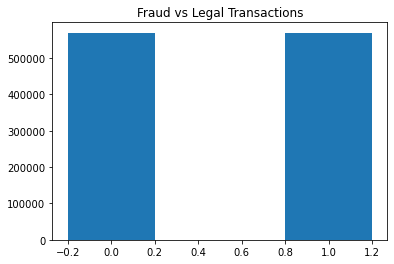

In [109]:
fraudCount = oversampled_Y.sum()
legalCount = oversampled_Y.shape[0] - fraudCount

plt.bar([1,0], [fraudCount, legalCount], width=0.4)
plt.title('Fraud vs Legal Transactions');

## Now we can notice that our dataset is balanced

In [111]:
X_trainOS, X_testOS, y_trainOS, y_testOS = train_test_split(oversampled_X, oversampled_Y, test_size=0.2, random_state=42);

In [112]:
dt_clf2 = DecisionTreeClassifier()
dt_clf2.fit(X_trainOS,y_trainOS)

DecisionTreeClassifier()

In [113]:
pred3 = dt_clf2.predict(X_testOS)
confusion_matrix(y_testOS, pred3)

array([[111122,   2816],
       [  2278, 111735]])

In [114]:
print(classification_report(y_testOS, pred3))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    113938
           1       0.98      0.98      0.98    114013

    accuracy                           0.98    227951
   macro avg       0.98      0.98      0.98    227951
weighted avg       0.98      0.98      0.98    227951



### Here we are getting better results as expected 

In [115]:
rf_clf2 = RandomForestClassifier(max_depth=4, random_state=0)

In [116]:
rf_clf2.fit(X_trainOS, y_trainOS)

RandomForestClassifier(max_depth=4, random_state=0)

In [117]:
pred4 = rf_clf2.predict(X_testOS)
confusion_matrix(y_testOS, pred4)

array([[100802,  13136],
       [ 16330,  97683]])

In [118]:
print(classification_report(y_testOS, pred4))b

              precision    recall  f1-score   support

           0       0.86      0.88      0.87    113938
           1       0.88      0.86      0.87    114013

    accuracy                           0.87    227951
   macro avg       0.87      0.87      0.87    227951
weighted avg       0.87      0.87      0.87    227951



### Exploring the ROC curves to understand our results -

In [119]:
import matplotlib.pyplot as plt
from sklearn import metrics

/Users/anshitbansal/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


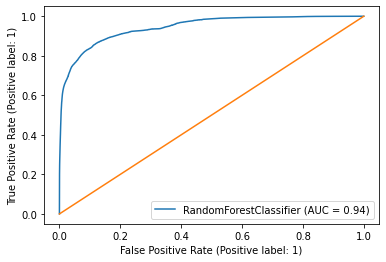

In [122]:
metrics.plot_roc_curve(rf_clf2, X_trainOS, y_trainOS)
plt.plot(np.linspace(0,1,1000),np.linspace(0,1,1000))

/Users/anshitbansal/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


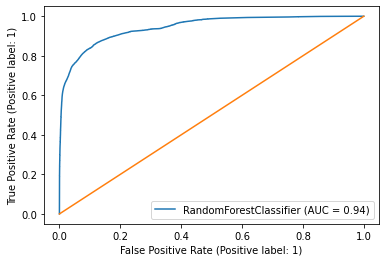

In [120]:
metrics.plot_roc_curve(rf_clf2, X_testOS, y_testOS)
plt.plot(np.linspace(0,1,1000),np.linspace(0,1,1000))

/Users/anshitbansal/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


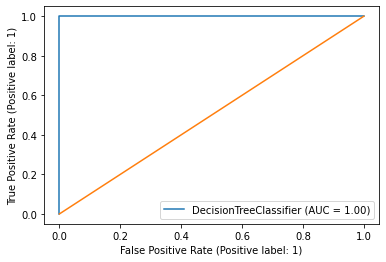

In [124]:
metrics.plot_roc_curve(dt_clf2, X_trainOS, y_trainOS)
plt.plot(np.linspace(0,1,1000),np.linspace(0,1,1000))

/Users/anshitbansal/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


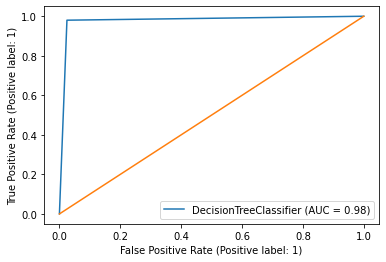

In [121]:
metrics.plot_roc_curve(dt_clf2, X_testOS, y_testOS)
plt.plot(np.linspace(0,1,1000),np.linspace(0,1,1000))

## Just a final attempt to look for better results - 

### Using randomised grid search CV 

In [125]:
from sklearn.model_selection import RandomizedSearchCV

In [133]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,5,10, 'None'],
    'min_samples_leaf': [2,4,8,10,20]
}

In [134]:
RS_cv = RandomizedSearchCV(dt_clf2, parameters)

In [136]:
score = RS_cv.fit(X_trainOS, y_trainOS)

/Users/anshitbansal/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/anshitbansal/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anshitbansal/miniforge3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/anshitbansal/miniforge3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 305, in fit
    if max_depth <= 0:
TypeError: '<=' no

In [139]:
score.best_params_

{'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'gini'}

In [140]:
score.best_score_

0.9484077148946224

## Conclusion 

* In this project we were able to see how the dataset we received was unbalanced and we were able to see how that dataset is useless for prediction since if even it predicts all cases as non frodulent we will get an accuracy of 97% 
* Then we explored the method known as SMOTE for oversampling the dataset which helped us to balance the dataset and predict better for both the categories 
* It is not necessary that complex models like Random Forests always give better results, we noticed that in this particular problem, Decision Trees were both easier to train and gave better results as well. 